In [4]:
import matplotlib.pyplot as plt

In [13]:
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import Adam
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import applications
from keras import backend as k


In [7]:
img = load_img('./input/train/train/Forward/screen_640x480_2018-01-15_12-18-58.png')  
x = img_to_array(img)  
print('image shape: ', x.shape)

image shape:  (480, 640, 3)


Step Forward after recognizing viwe


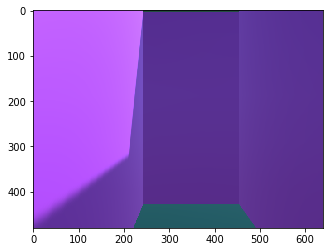

In [8]:
print('Step Forward after recognizing viwe')
plt.imshow(img)
plt.show()

Turn Left after recognizing viwe


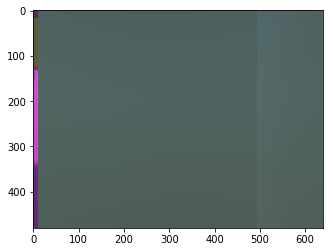

In [9]:
img = load_img('./input/train/train/Left/screen_640x480_2018-01-15_12-18-50.png')  
x = img_to_array(img) 
print('Turn Left after recognizing viwe')
plt.imshow(img)
plt.show()

In [10]:
img = load_img('./input/train/train/Right/screen_640x480_2018-01-15_14-27-30.png')  
x = img_to_array(img)  # this is a Numpy array with shape (3, 480, 640)


Turn Right after recognizing viwe


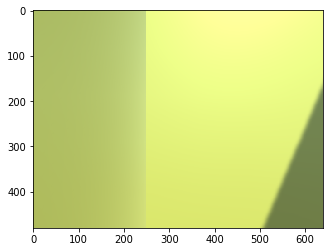

In [11]:
print('Turn Right after recognizing viwe')
plt.imshow(img)
plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(24, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model=applications.VGG19(weights='imagenet')
for layer in model.layers[:]:
    layer.trainable=False
x = model.output
predictions = Dense(3, activation="softmax")(x)
model_final = Model(input=model.input, output=predictions)
model_final.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/home/devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2)


test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
batch_size = 64

In [18]:

train_generator = train_datagen.flow_from_directory(
        './input/train/train',  
        target_size=(224, 224),  
        batch_size=batch_size)  

validation_generator = test_datagen.flow_from_directory(
        './input/test/test',
        target_size=(224, 224),
        batch_size=batch_size)

Found 1370 images belonging to 3 classes.
Found 340 images belonging to 3 classes.


In [19]:
def plot_res():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [21]:
import scipy.ndimage

history = model_final.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/5
31/31 [==============================] - 691s 22s/step - loss: 1.0737 - acc: 0.7634 - val_loss: 1.0449 - val_acc: 0.8088
Epoch 2/5
31/31 [==============================] - 703s 23s/step - loss: 1.0189 - acc: 0.8144 - val_loss: 0.9930 - val_acc: 0.8088
Epoch 3/5
31/31 [==============================] - 726s 23s/step - loss: 0.9697 - acc: 0.8112 - val_loss: 0.9460 - val_acc: 0.8088
Epoch 4/5
31/31 [==============================] - 763s 25s/step - loss: 0.9203 - acc: 0.8216 - val_loss: 0.9035 - val_acc: 0.8088
Epoch 5/5
31/31 [==============================] - 757s 24s/step - loss: 0.8859 - acc: 0.8073 - val_loss: 0.8662 - val_acc: 0.8088


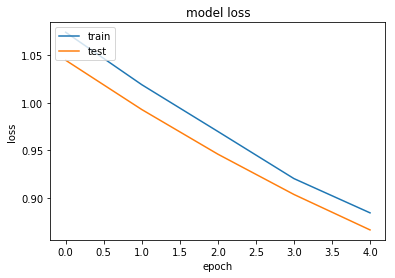

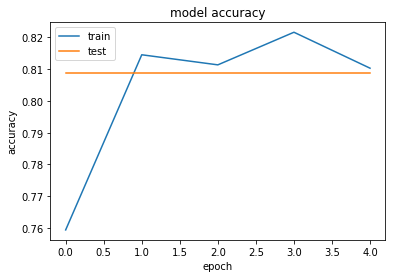

In [22]:
plot_res()

In [17]:
import scipy
import numpy as np

In [18]:
def get_reshape(x=img):
    img_resize = scipy.misc.imresize(x,(150,150,3))
    img_reshape = np.empty((1,150,150,3), dtype='float')
    img_reshape[0,:,:,:] = img_resize
    return(img_reshape)

In [19]:
def get_prediction(img_reshaped):
    pred = history.model.predict_classes(img_reshaped)[0]
    
    
    for action, val in train_generator.class_indices.items():   
        if val == pred:
            pred = action
    return(pred)

The label of image is marked as Forward


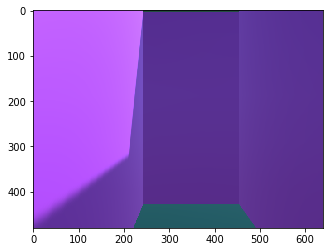

/home/devansh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


The predicted action to take is :  Forward
-------------------------------------------


In [20]:
img = load_img('./input/train/train/Forward/screen_640x480_2018-01-15_12-18-58.png')
x = img_to_array(img) 

print('The label of image is marked as Forward')
plt.imshow(img)
plt.show()

img_reshaped = get_reshape(x)
pred = get_prediction(img_reshaped)
print('The predicted action to take is : ', pred)
print('-------------------------------------------')

In [2]:
img = load_img('./input/test/test/Left/screen_640x480_2018-01-15_10-17-47.png')
x = img_to_array(img)  

print('The label of image is marked as Left')
plt.imshow(img)
plt.show()

img_reshaped = get_reshape(x)
pred = get_prediction(img_reshaped)
print('Prediction : ', pred)

NameError: name 'load_img' is not defined

In [1]:
img = load_img('./midDoor.jpg')
x = img_to_array(img)  

print('The label of image is marked as Left')
plt.imshow(img)
plt.show()

img_reshaped = get_reshape(x)
pred = get_prediction(img_reshaped)
print('Prediction : ', pred)

NameError: name 'load_img' is not defined